In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import sys

ROOT_DIR = '..'
sys.path.append(ROOT_DIR)

# Implementação 4.2 (Opcional)

- Um loco com três alelos
- Dominância de A sobre B e C
- Paisagem adaptativa: p1 x p2 x p3

In [4]:
# plt.switch_backend('inline')
%matplotlib inline

In [5]:
def next_gen(p2, pq, pr, q2, qr, r2, wAA, wAB, wAC, wBB, wBC, wCC):
    # Calcular frequência ajustada
    wAA_adj = wAA * p2
    wAB_adj = wAB * pq
    wAC_adj = wAC * pr
    wBB_adj = wBB * q2
    wBC_adj = wBC * qr
    wCC_adj = wCC * r2

    # Calcular aptidão média
    w_med = wAA_adj + wAB_adj + wAC_adj + wBB_adj + wBC_adj + wCC_adj

    # Calcular frequência após seleção
    wAA_apos = wAA_adj / w_med
    wAB_apos = wAB_adj / w_med
    wAC_apos = wAC_adj / w_med
    wBB_apos = wBB_adj / w_med
    wBC_apos = wBC_adj / w_med
    wCC_apos = wCC_adj / w_med

    # Calcular frequências alélicas após
    p1 = wAA_apos + 0.5 * (wAB_apos + wAC_apos)
    q1 = wBB_apos + 0.5 * (wAB_apos + wBC_apos)
    r1 = wCC_apos + 0.5 * (wAC_apos + wBC_apos)

    return p1, q1, r1, w_med

def calc_freq(p0, q0, r0):
    # Calcular frequências dos genótipos
    p2 = p0**2
    pq = 2 * p0 * q0
    pr = 2 * p0 * r0
    q2 = q0**2
    qr = 2 * q0 * r0
    r2 = r0**2
    return p2, pq, pr, q2, qr, r2

def run(p0, q0, r0, wAA, wAB, wAC, wBB, wBC, wCC, n_gen):
    decimals = 10
    p2, pq, pr, q2, qr, r2 = calc_freq(p0, q0, r0)

    p_list = [p0]
    q_list = [q0]
    r_list = [r0]
    p2_list = [p2]
    pq_list = [pq]
    pr_list = [pr]
    q2_list = [q2]
    qr_list = [qr]
    r2_list = [r2]
    delta_p = []
    w_med_list = []

    for i in range(n_gen):
        p, q, r, w_med = next_gen(p2_list[i], pq_list[i], pr_list[i], q2_list[i], qr_list[i], r2_list[i], wAA, wAB, wAC, wBB, wBC, wCC)
        p2, pq, pr, q2, qr, r2 = calc_freq(p, q, r)

        delta_p.append(abs(p - p_list[i]))
        p_list.append(p)
        q_list.append(q)
        r_list.append(r)
        p2_list.append(p2)
        pq_list.append(pq)
        pr_list.append(pr)
        q2_list.append(q2)
        qr_list.append(qr)
        r2_list.append(r2)
        w_med_list.append(w_med)

    # Plot da paisagem adaptativa
    plt.figure(figsize=(16, 9))

    plt.subplot(2, 3, 1)
    plt.plot(p_list, label='p (A)')
    plt.plot(q_list, label='q (B)')
    plt.plot(r_list, label='r (C)')
    plt.title("Frequências alélicas por geração")
    plt.legend()

    plt.subplot(2, 3, 2)
    plt.plot(p2_list, label='p² (AA)')
    plt.plot(pq_list, label='pq (AB)')
    plt.plot(pr_list, label='pr (AC)')
    plt.plot(q2_list, label='q² (BB)')
    plt.plot(qr_list, label='qr (BC)')
    plt.plot(r2_list, label='r² (CC)')
    plt.title("Frequências genotípicas por geração")
    plt.legend()

    plt.subplot(2, 3, 3)
    plt.plot(w_med_list, label='w_médio')
    plt.title("Aptidão média por geração")
    plt.legend()
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.plot(delta_p, label='Δp por geração')
    plt.title("Variação da frequência alélica p por geração")
    plt.legend()
    plt.show()

    plt.figure(figsize=(16, 9))
    plt.plot(w_med_list, label='w_médio')
    plt.plot(p_list[1:], label='p (A)')
    plt.plot(q_list[1:], label='q (B)')
    plt.plot(r_list[1:], label='r (C)')
    plt.title("Paisagem adaptativa: Aptidão média e frequências alélicas por geração")
    plt.legend()
    plt.show()

    # Plota as variaveis independetes
    # 3D plot
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111, projection='3d')

    X = p_list[1:]
    Y = q_list[1:]
    Z = w_med_list

    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    
    
    X_grid, Y_grid = np.meshgrid(X, Y)
    Z_grid = np.array([w_med_list for _ in range(len(X))])

    surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap=cm.viridis, edgecolor='k', alpha=0.6)

    # Set labels
    ax.set_xlabel('Frequency of Allele A (p)')
    ax.set_ylabel('Frequency of Allele B (q)')
    ax.set_zlabel('Mean Fitness (w)')
    ax.set_title('Adaptive Landscape: Mean Fitness and Allele Frequencies')

    # Add color bar to indicate the mean fitness
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.ion()
    plt.show()



# Caso 1

Dominância de A sobre B e C

|     | A   | B   | C   |
|-----|-----|-----|-----|
| A   | 1   | 1   | 1   |
| B   | 1   | 0.9 | 0.9 |
| C   | 1   | 0.9 | 0.9 |

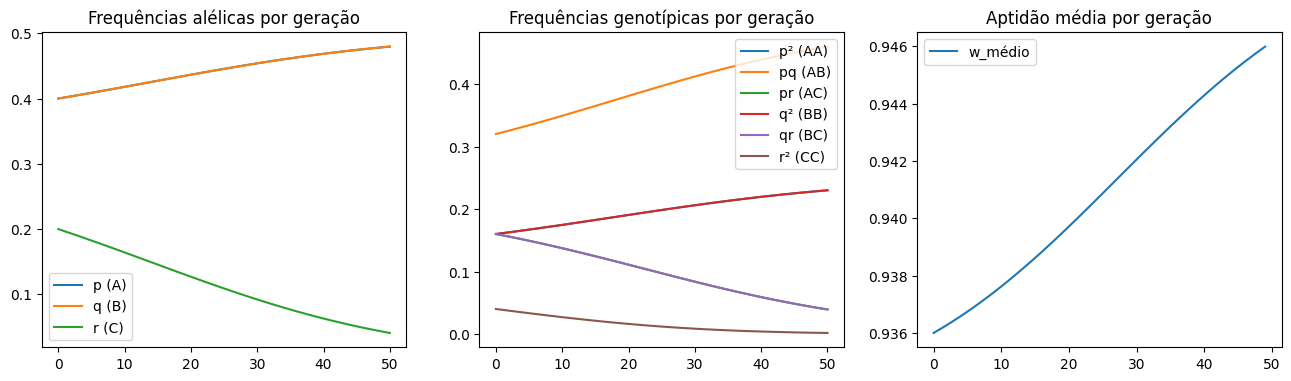

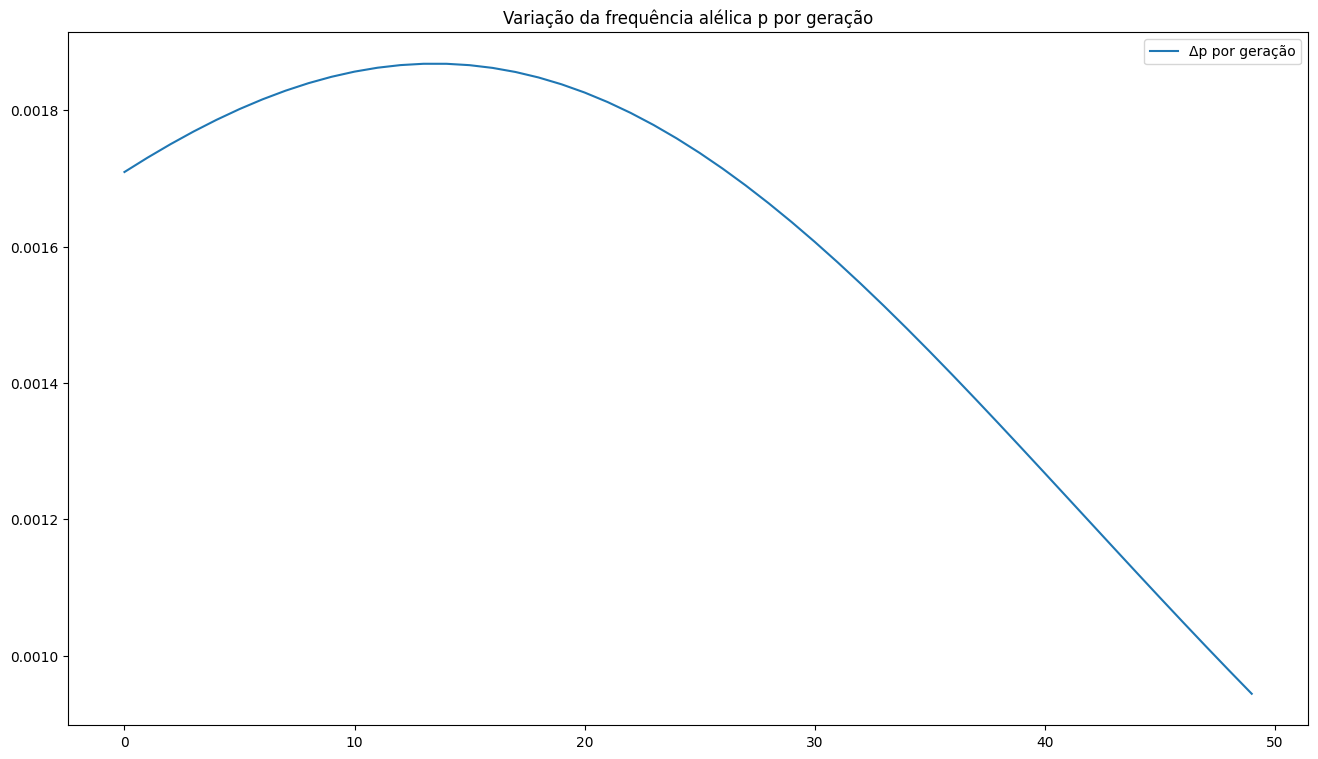

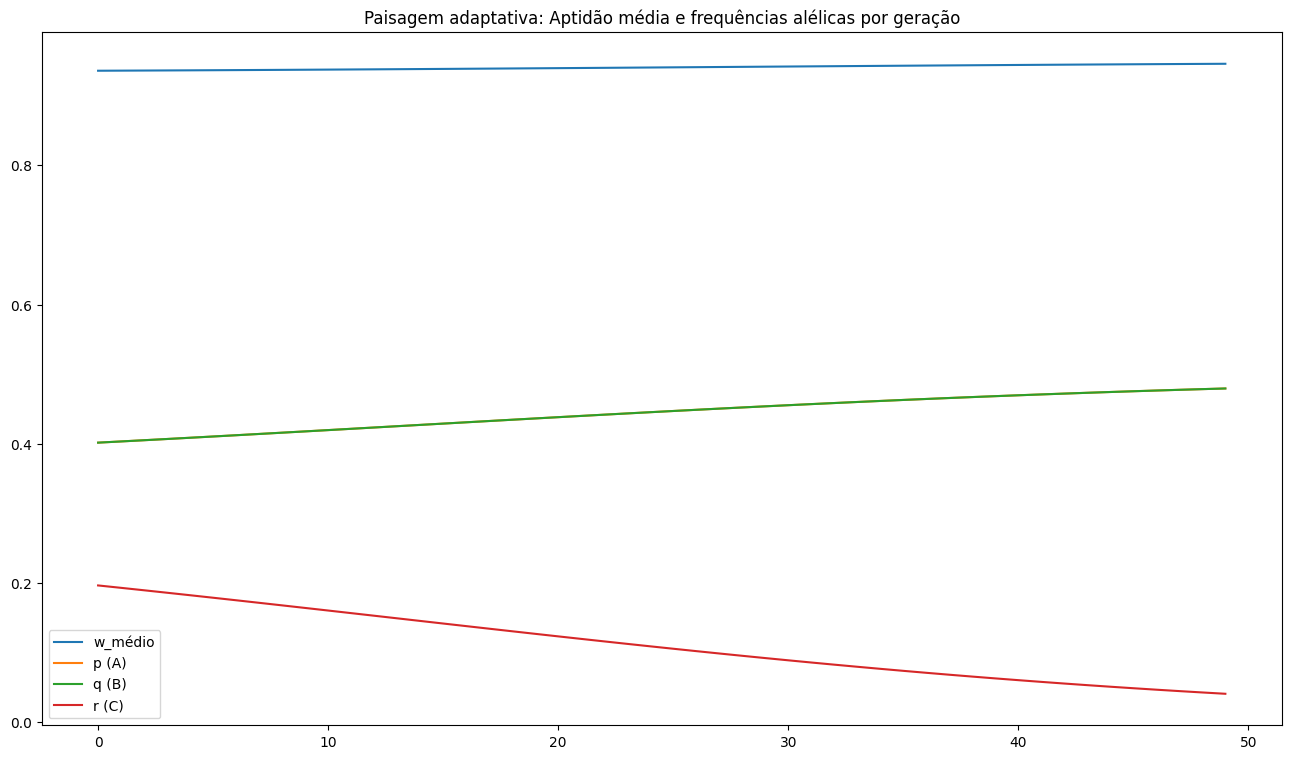

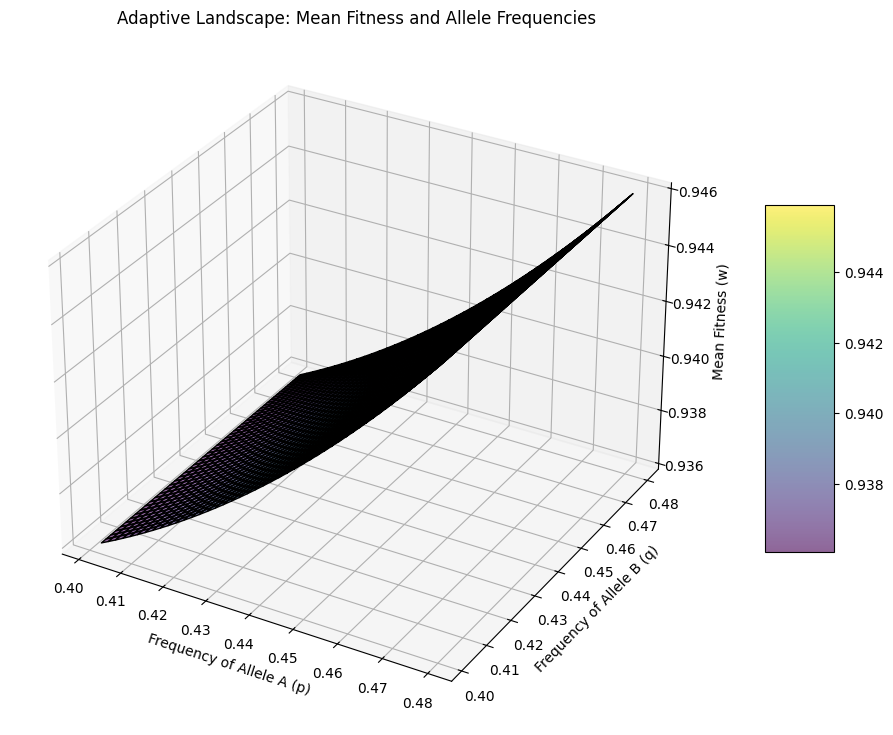

In [6]:
p0 = 0.4
q0 = 0.4
r0 = 1 - p0 - q0
wAA = 1.0
wAB = 0.9
wAC = 0.9
wBB = 1.0
wBC = 0.9
wCC = 1.0
n_gen = 50

run(p0, q0, r0, wAA, wAB, wAC, wBB, wBC, wCC, n_gen)

# Caso 2

Sobredominância

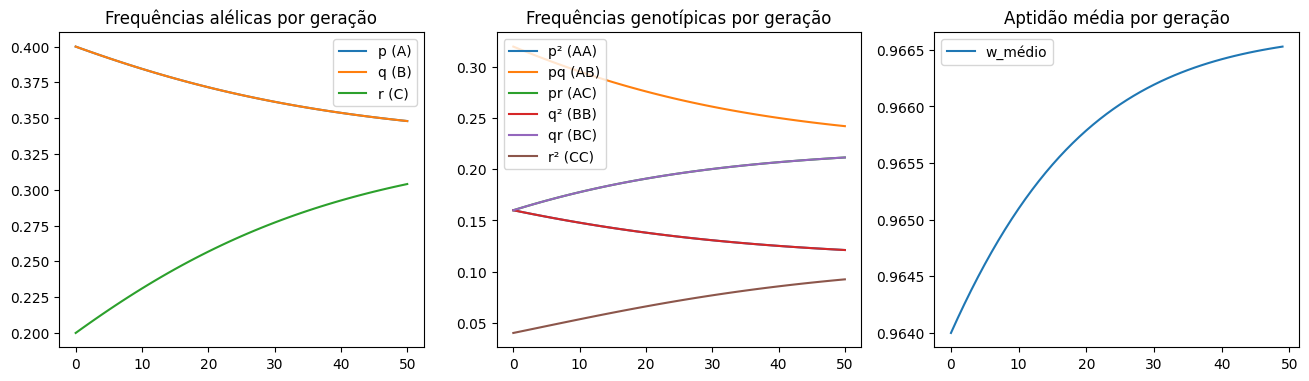

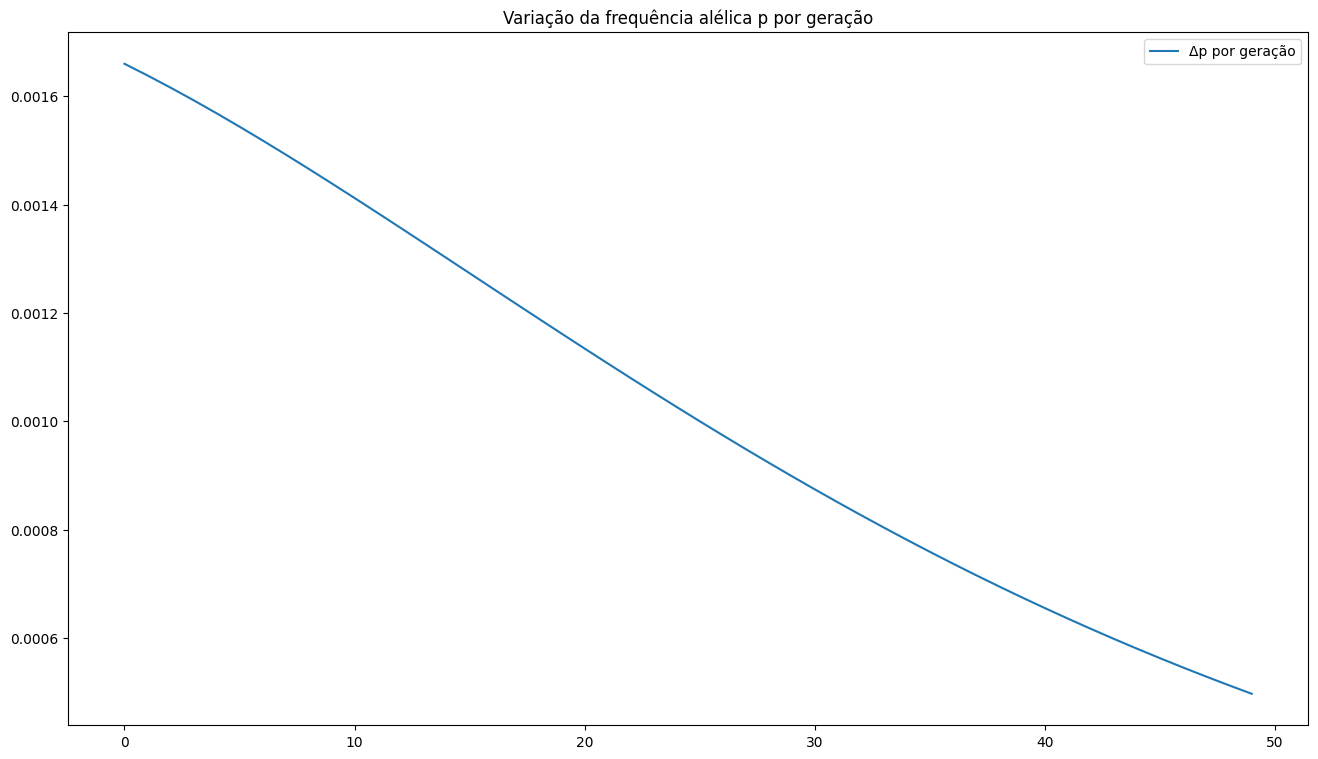

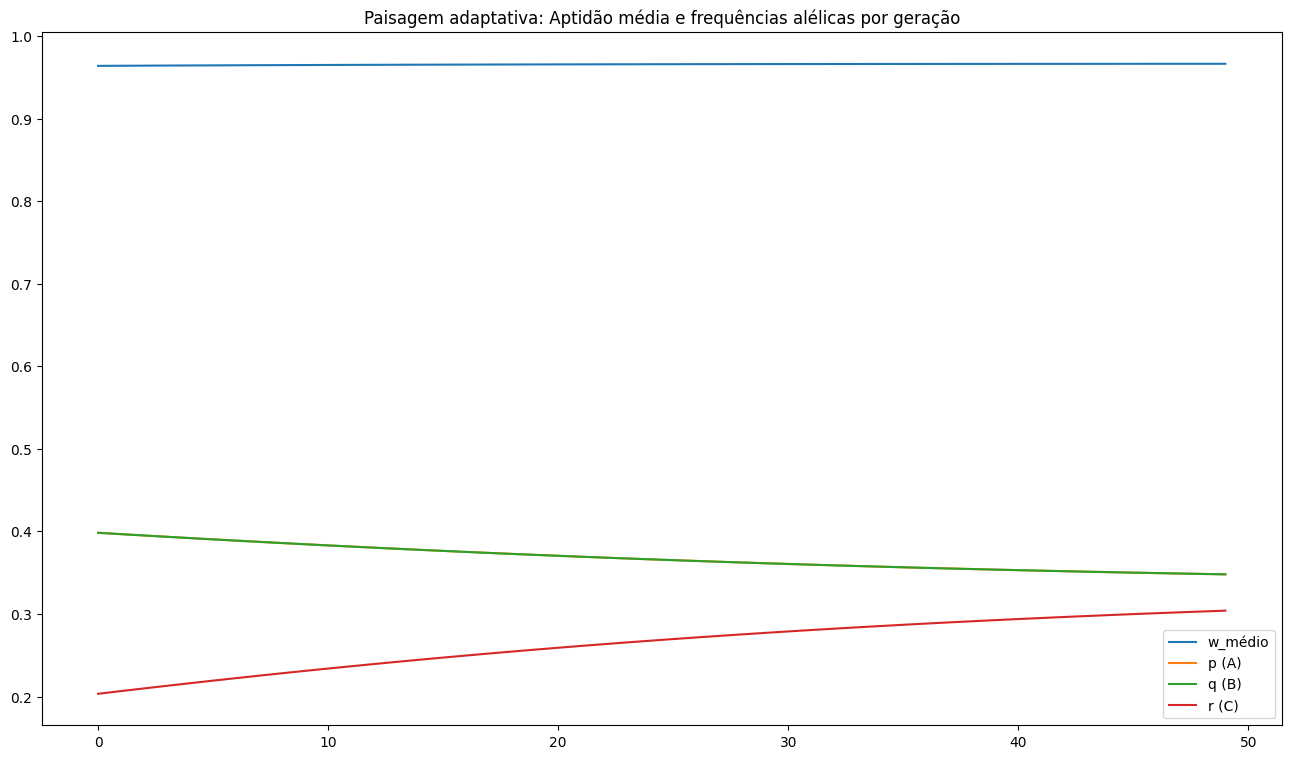

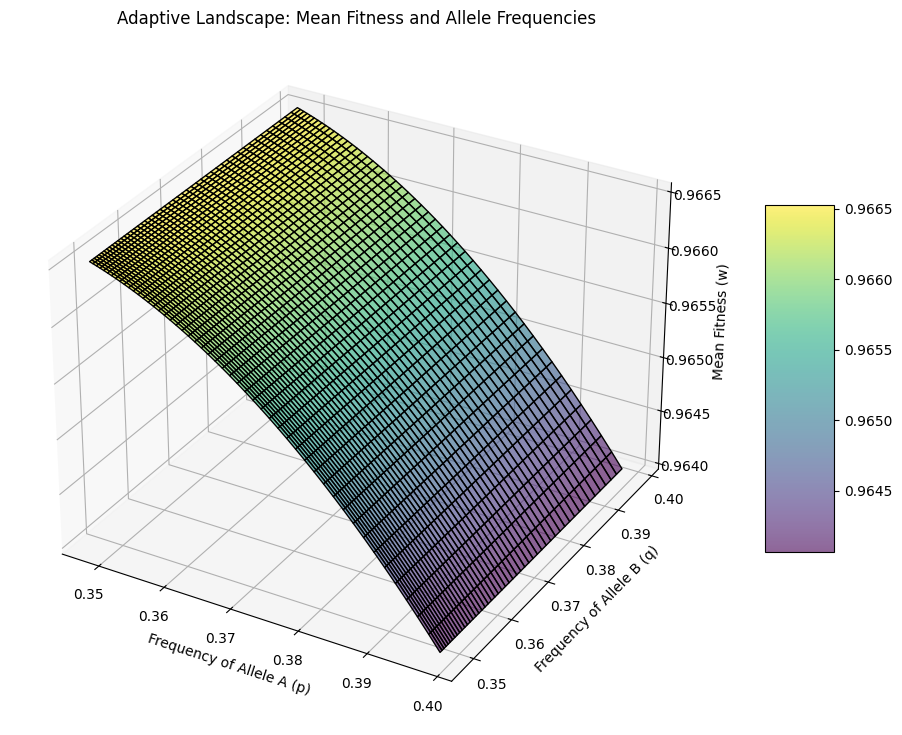

In [7]:
p0 = 0.4
q0 = 0.4
r0 = 1 - p0 - q0
wAA = 0.9
wAB = 1
wAC = 1
wBB = 0.9
wBC = 1
wCC = 0.9
n_gen = 50

run(p0, q0, r0, wAA, wAB, wAC, wBB, wBC, wCC, n_gen)

# Caso 3
Codominância
w do heterozigoto é a média dos homozigotos

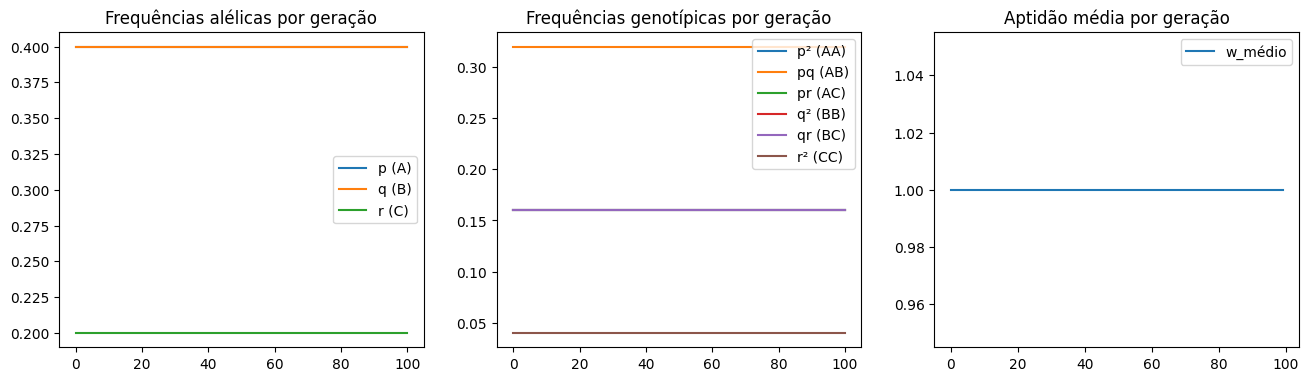

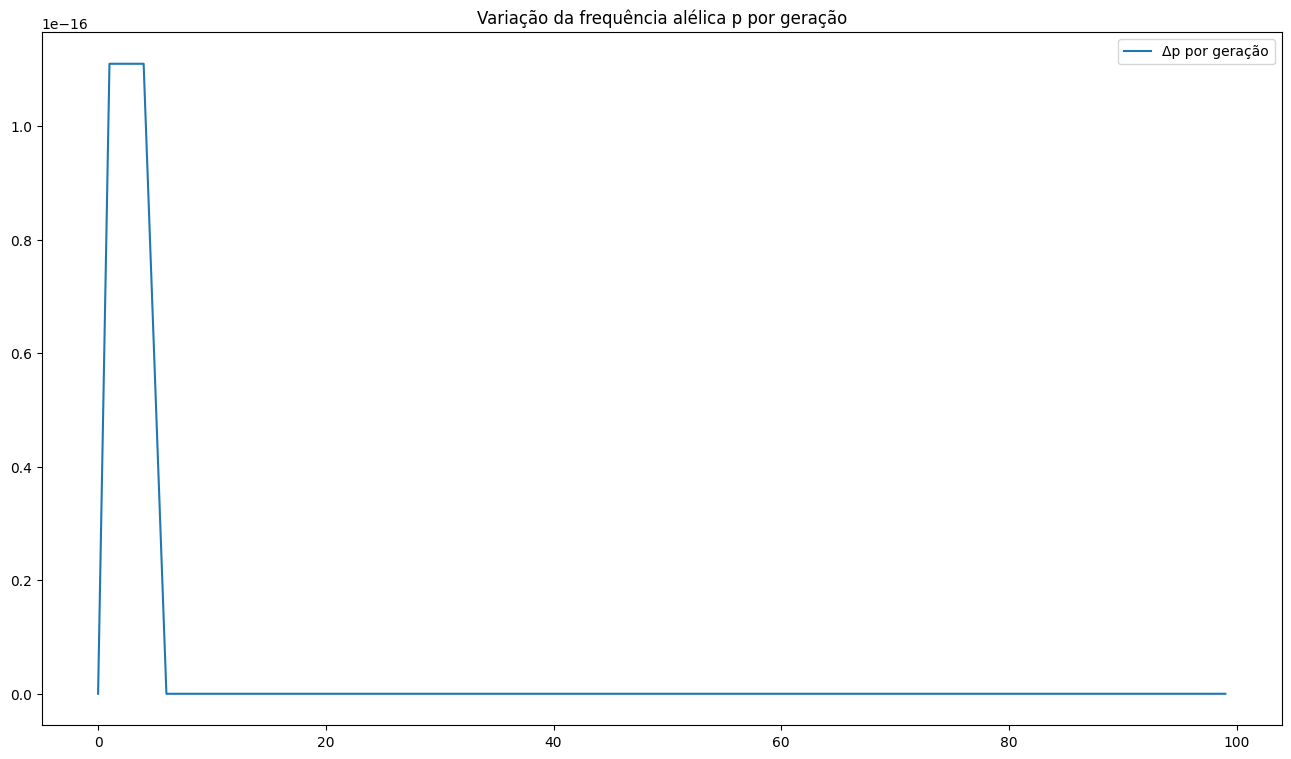

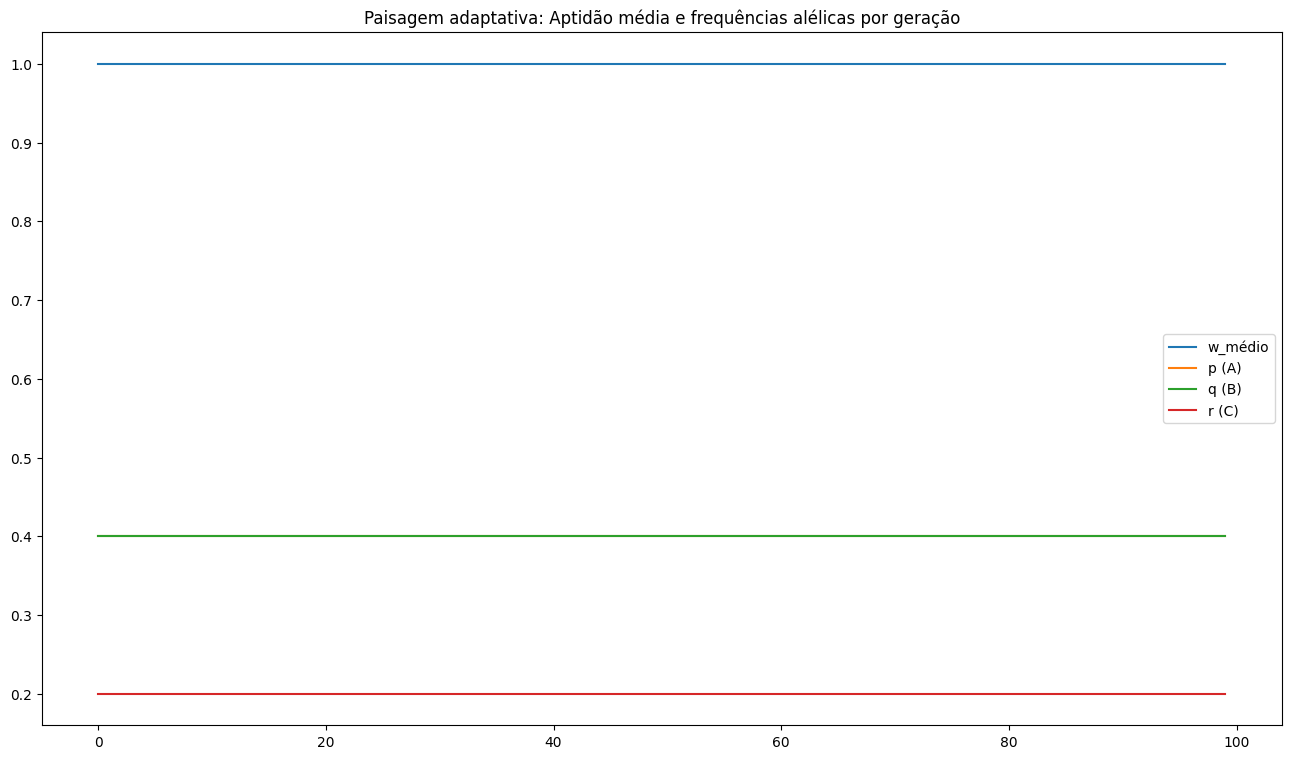

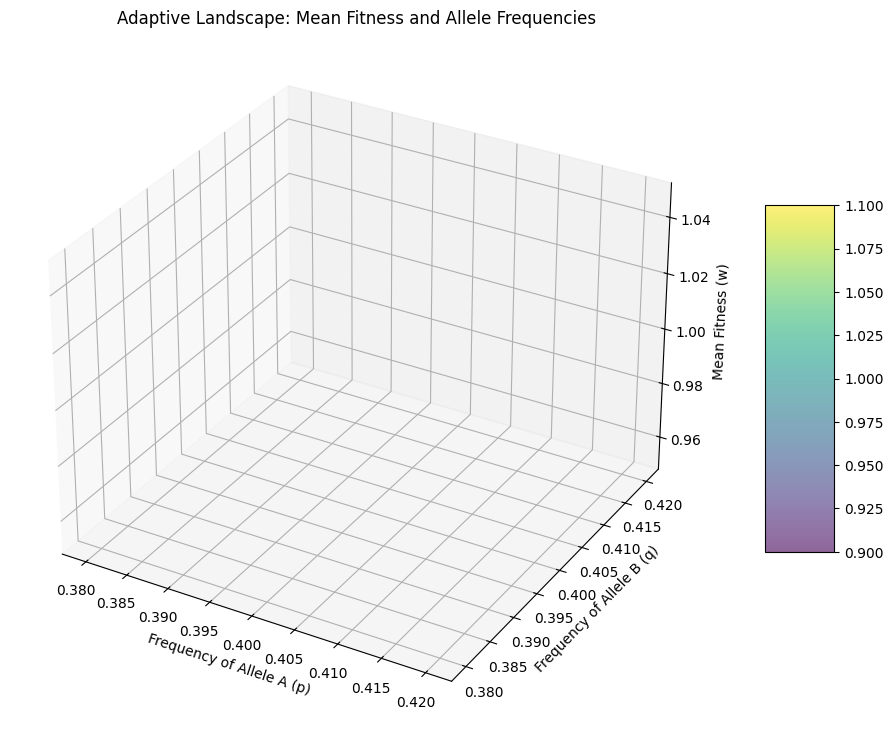

In [9]:
p0 = 0.4
q0 = 0.4
r0 = 1 - p0 - q0

wAA = 1
wBB = 1
wCC = 1

wAB = (wAA + wBB) / 2
wAC = (wAA + wCC) / 2
wBC = (wBB + wCC) / 2

n_gen = 100

run(p0, q0, r0, wAA, wAB, wAC, wBB, wBC, wCC, n_gen)

# Caso 4

Desvantagem do Heterozigoto

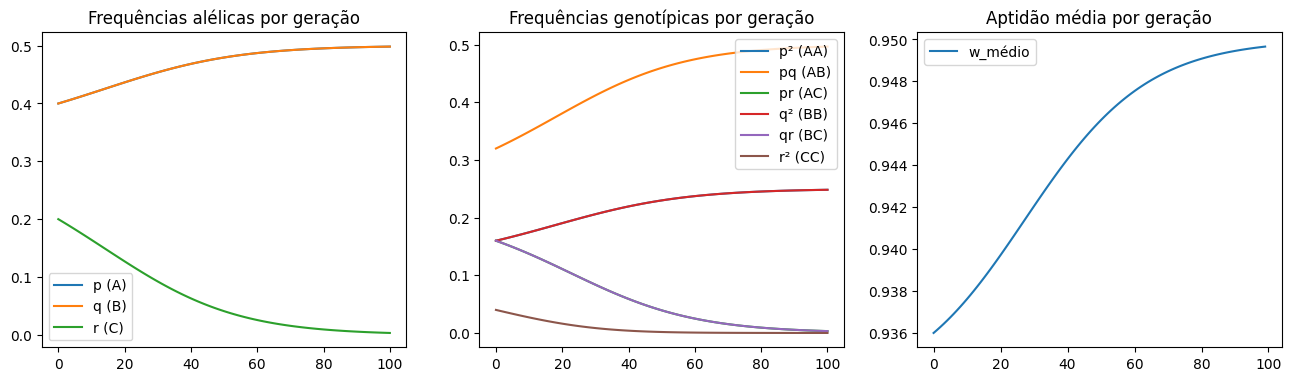

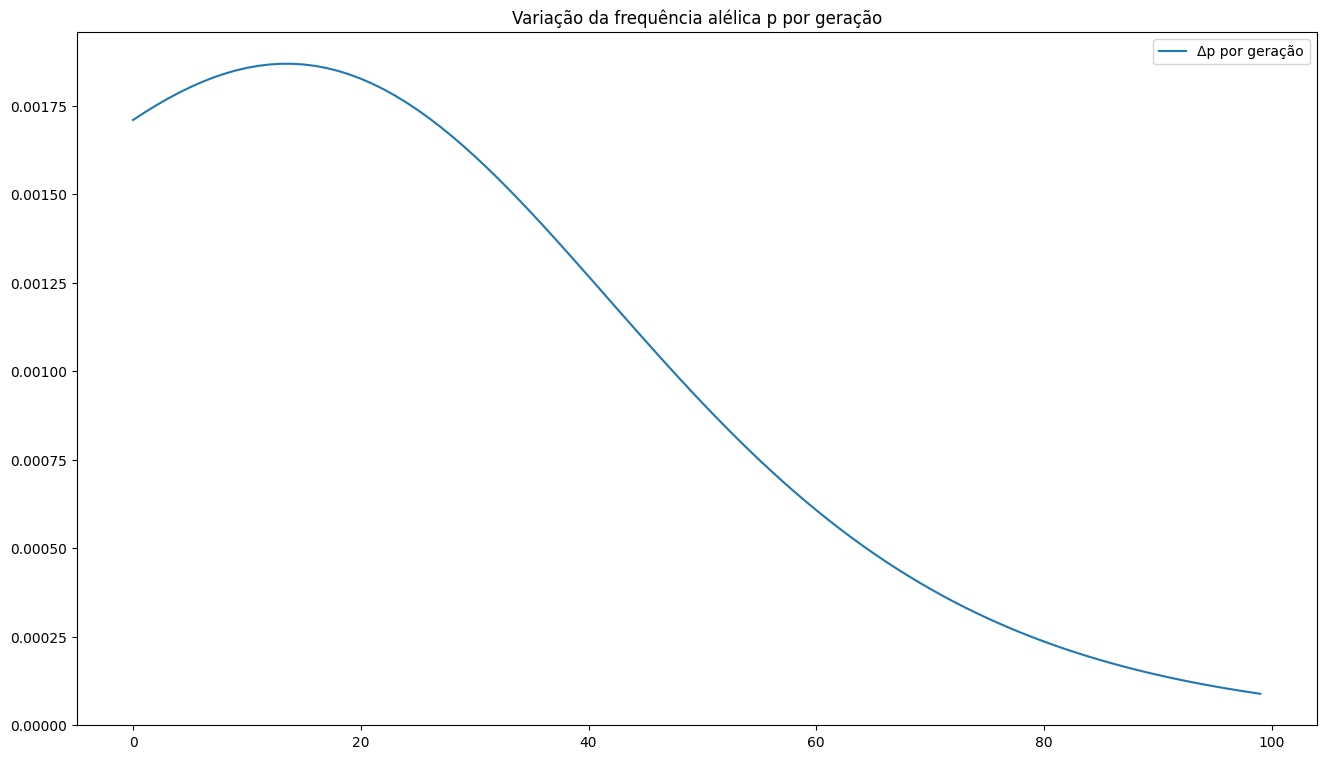

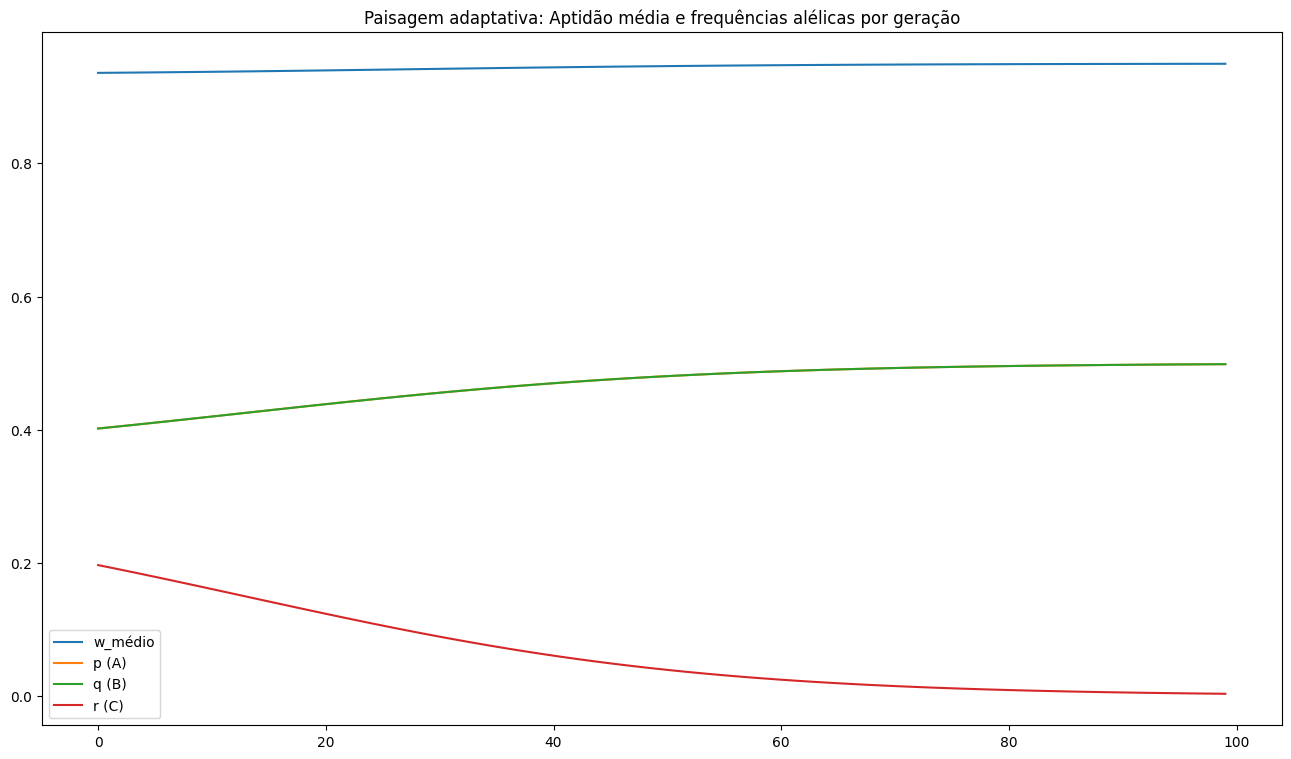

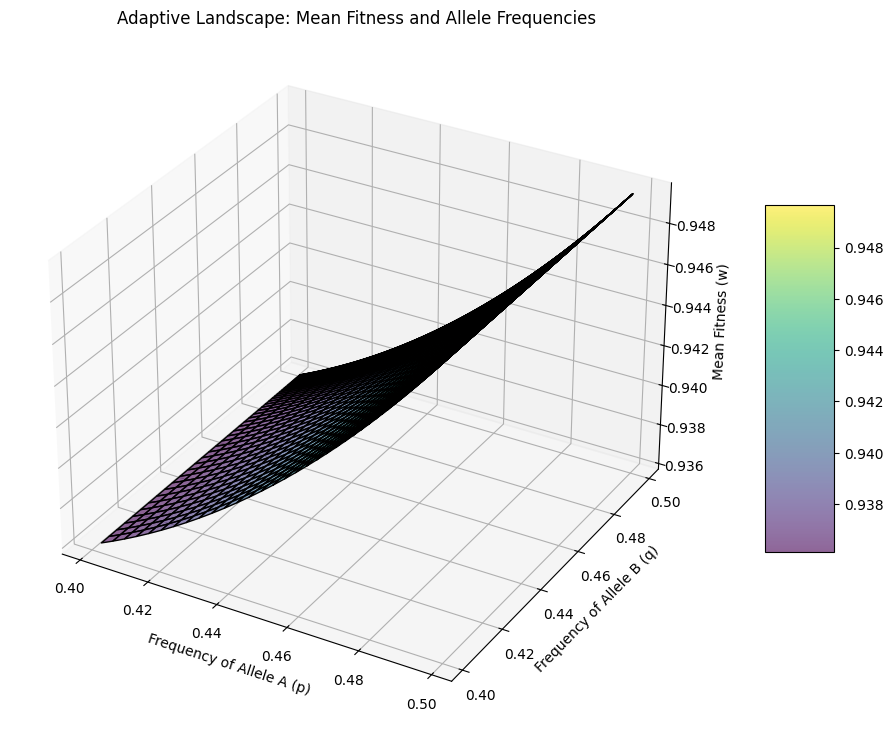

In [10]:
p0 = 0.4
q0 = 0.4
r0 = 1 - p0 - q0

wAA = 1
wBB = 1
wCC = 1
wAB = 0.9
wAC = 0.9
wBC = 0.9

n_gen = 100

run(p0, q0, r0, wAA, wAB, wAC, wBB, wBC, wCC, n_gen)